<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/example%20GNN%20GraphML%20format.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install torch geometric
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-2.4.0+cu121.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-2.4.0+cu121.html
!pip install -q torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.7 MB/s eta 0:00:00


In [58]:
import torch
from torch_geometric.data import Data
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
from networkx.readwrite import write_graphml

In [37]:
def pyg_to_graphml(data, node_labels=None, output_file="graph.graphml"):
    """
    Convert PyTorch Geometric Data object to NetworkX graph and save as GraphML.

    Args:
        data: PyG Data object with edge_index, x, y, and optional edge_attr
        node_labels: List of node labels (strings)
        output_file: Output GraphML filename
    """
    # Create directed graph (use nx.Graph() for undirected)
    nx_graph = nx.DiGraph()

    # Add nodes with features, labels, and target values (y)
    for i in range(data.x.shape[0]):
        node_attrs = {}

        # Handle node features (x)
        features = data.x[i].tolist()
        if isinstance(features, list):
            if len(features) == 1:
                node_attrs["features"] = float(features[0])  # Single value as float
            else:
                # Convert multi-dimensional features to string
                node_attrs["features"] = ';'.join(map(str, features))  # CSV-like format
        else:
            node_attrs["features"] = float(features)

        # Add node labels if provided
        if node_labels is not None:
            node_attrs["label"] = str(node_labels[i])

        # Add target values (y) if they exist
        if hasattr(data, 'y') and data.y is not None:
            if data.y.dim() == 0:  # Single graph label
                if i == 0:  # Only add once for graph-level label
                    nx_graph.graph["graph_label"] = int(data.y.item())
            else:  # Node-level labels
                node_attrs["target"] = int(data.y[i].item())

        nx_graph.add_node(i, **node_attrs)

    # Add edges with weights if available
    for i in range(data.edge_index.shape[1]):
        source, target = data.edge_index[:,i]
        edge_attrs = {}
        if hasattr(data, 'edge_attr') and data.edge_attr is not None:
            edge_attrs["weight"] = float(data.edge_attr[i].item())
        nx_graph.add_edge(source.item(), target.item(), **edge_attrs)

    # Save as GraphML
    write_graphml(nx_graph, output_file)
    print(f"Graph saved to {output_file}")

# Example usage with all possible attributes
edge_index = torch.tensor([[0, 1, 1, 2, 3], [1, 0, 2, 1, 1]], dtype=torch.long)
edge_weights = torch.tensor([0.5, 0.3, 1.2, 0.8, 0.4], dtype=torch.float)
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float)
y = torch.tensor([1, 0, 2, 1], dtype=torch.long)  # Node-level targets
node_labels = ["Node A", "Node B", "Node C", "Node D"]

# Create Data object with all attributes
data = Data(x=x, edge_index=edge_index, edge_attr=edge_weights, y=y)

# Save to GraphML
pyg_to_graphml(data, node_labels=node_labels, output_file="complete_graph.graphml")

Graph saved to complete_graph.graphml


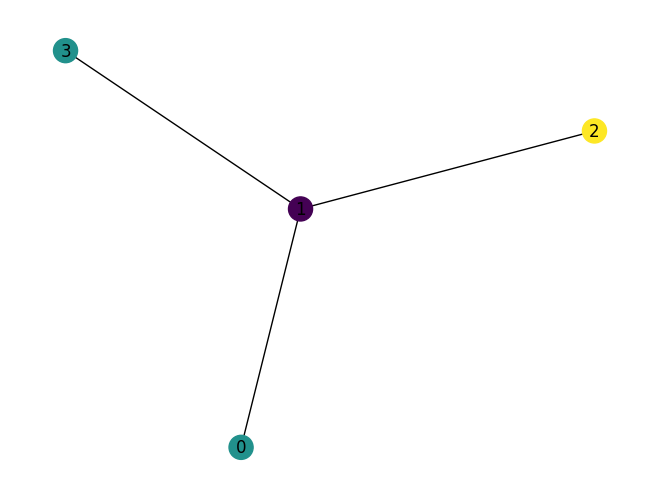

In [34]:
G = to_networkx(data, to_undirected=True)

pos = nx.spring_layout(G) # Layout of the graph
nx.draw(G, pos, with_labels=True, node_color=data.y.numpy())

# Karate Club Example

In [40]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {(data.num_edges) / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4
Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


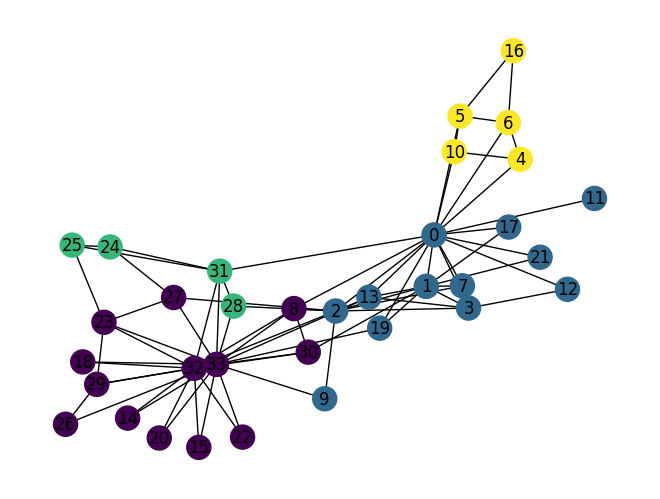

In [49]:
G = to_networkx(data, to_undirected=True)

pos = nx.spring_layout(G) # Layout of the graph
nx.draw(G, pos, with_labels=True, node_color=data.y.numpy())


In [50]:
data

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

In [84]:
node_labels = data.y.numpy()

In [85]:
pyg_to_graphml(data, node_labels = node_labels, output_file="karate_graph.graphml")


Graph saved to karate_graph.graphml


In [94]:
node_color = np.array(list(nx.get_node_attributes(g, 'label').values()), dtype=int)

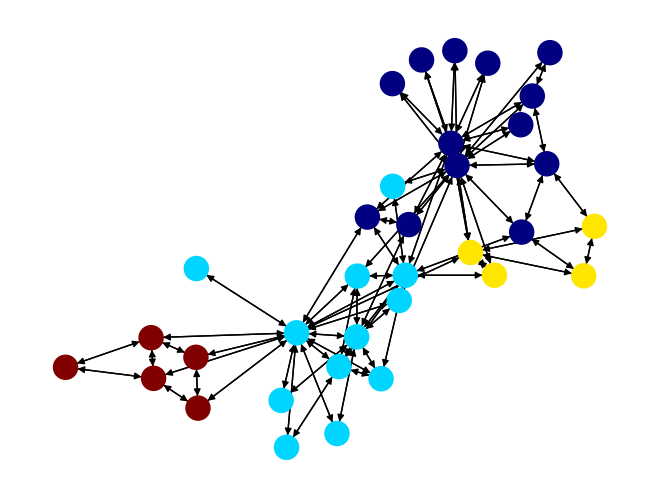

In [95]:
g = nx.read_graphml('karate_graph.graphml')

plt.figure()
nx.draw(g, cmap=plt.get_cmap('jet'),
    node_color=node_color)
plt.show()